# Tensorflow model
This time will train a Tensorflow model to try to predict the correct targets

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("test_data.csv", sep=";")

In [3]:
df = df.drop("Unnamed: 0", axis=1)

In [4]:
df = df.set_index("id")

In [5]:
country_index = list(df["country"].unique())
platform_index = list(df["creation_platform"].unique())
source_index = list(df["source_pulido"].unique())

In [6]:
df_num_values = df.drop(["country", "creation_platform", "source_pulido"], axis=1)
df_num_values["country_index"] = df["country"].apply(lambda i: country_index.index(i))
df_num_values["creation_platform_index"] = df["creation_platform"].apply(lambda i: platform_index.index(i))
df_num_values["source_pulido_index"] = df["source_pulido"].apply(lambda i: source_index.index(i))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_num_values.drop("target", axis=1), df_num_values.target, test_size=0.2, random_state=42)

Let's create a binary classification model.

It will be composed by two Dense layers and one last output layer, with only one unit

In [40]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

As a loss function, we'll use `binary_crossentropy`, since we are trying to predict a binary classification.

For optimizer, we will use the Adam, with a learning rate of 10e-4

In [41]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=10e-4), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's train for 5 epochs using a batch size of 32.

In [43]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
14634/14634 [==============================] - 36s 2ms/step - loss: 0.2665 - accuracy: 0.9159 - val_loss: 0.2151 - val_accuracy: 0.9195
Epoch 2/5
14634/14634 [==============================] - 35s 2ms/step - loss: 0.2096 - accuracy: 0.9205 - val_loss: 0.2060 - val_accuracy: 0.9216
Epoch 3/5
14634/14634 [==============================] - 36s 2ms/step - loss: 0.2074 - accuracy: 0.9206 - val_loss: 0.2051 - val_accuracy: 0.9220
Epoch 4/5
14634/14634 [==============================] - 36s 2ms/step - loss: 0.2064 - accuracy: 0.9206 - val_loss: 0.2044 - val_accuracy: 0.9220
Epoch 5/5
14634/14634 [==============================] - 35s 2ms/step - loss: 0.2057 - accuracy: 0.9208 - val_loss: 0.2034 - val_accuracy: 0.9213


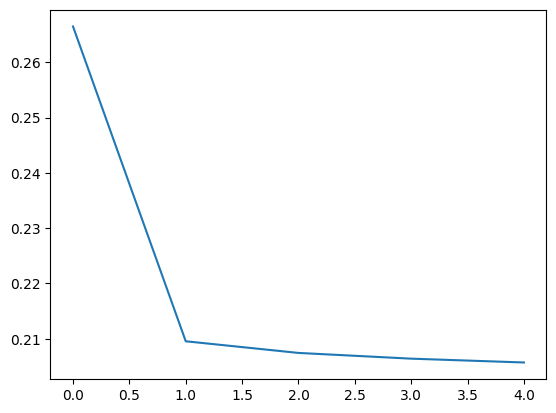

In [44]:
plt.plot(history.history["loss"])

Our model converded too fast, but our loss seems fine.

Let's find our threshold and check the results

In [45]:
y_pred_proba = model.predict(X_test)

3659/3659 [==============================] - 3s 810us/step


In [46]:
positive_values = y_pred_proba[y_test == 1]
negative_values = y_pred_proba[y_test == 0]

In [47]:
np.percentile(positive_values, [0, 30, 50, 70, 100])

array([2.17502922e-08, 1.54840893e-01, 2.53974840e-01, 3.44055560e-01,
       9.99622941e-01])

In [48]:
threshold = 0.13

In [49]:
unique, counts = np.unique((positive_values > threshold), return_counts=True)
print(unique, counts)
print("Accuracy:", counts[1]/counts.sum())

[False  True] [2440 6880]
Accuracy: 0.7381974248927039


In [50]:
unique, counts = np.unique((negative_values <= threshold), return_counts=True)
print(unique, counts)
print("Accuracy:", counts[1]/counts.sum())

[False  True] [18481 89267]
Accuracy: 0.8284794149311356


Our tensorflow model performed slightly better on negative targets and a little worse on positive targets

In [52]:
model.save("models/binary_classification_model")

INFO:tensorflow:Assets written to: models/binary_classification_model/assets


INFO:tensorflow:Assets written to: models/binary_classification_model/assets
